Assignment: Unsupervised Learning on SMS Spam Collection Dataset
--

1 . Understanding the data
--
    .The SMS Spam Collection dataset is a widely used dataset for text classification and natural language processing tasks. 
    
    . Dataset Description:
        .The dataset contains a total of 5,572 rows and 2 columns . Each message is labeled either as spam or ham(not a spam)

    . Significance Of Each Feature:
        .we have two features label and messages

        1. label:
            .Label Feature Indicates That whether the SMS Messages are Spam or Ham
            .It consists of two categories spam or ham 
            .Spam : it classified message as spam
            .Ham : it classified message as Ham(not a spam)

        2.message:
            .This feature contains the actual content of each SMS message
            .Contains the actual SMS content used for analysis
            
    
    

In [71]:
## IMPORTING LIBRARIES
import pandas as pd ## for data processing
import numpy as np ## for numerical operations

In [72]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [73]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [74]:
df.tail(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [75]:
## SUMMARY OF THE DATA FRAME 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


2 . TEXT PREPROCESSING
--

In [76]:
df.isnull().sum()  ## CHECKING THE MISSING VALUES

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [77]:
### HANDLING THE MISSING VALUES By REMOVING THE COLUMNS WITH NAN VALUES
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])


In [78]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
## RENAMING THE COLUMN NAMES FOR BETTER UNDERSTANDING
df = df.rename(columns={'v1':'label', 'v2':'message'})

In [80]:
df.columns

Index(['label', 'message'], dtype='object')

In [81]:
## USING LabelEncoder TECHQNIQUE FOR ENCODING SPAM-->1 AND HAM-->0

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [82]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [84]:
df.isnull().sum() ## CHECKING THE MISSING VALUES 

label      0
message    0
dtype: int64

In [85]:
## CHECKING AND REMOVING THE DUPLICATE VALUES
print('DUPLICATES VALUE COUNT -->',df.duplicated().sum())
df=df.drop_duplicates(keep='first')
print('AFTER REMOVING DUPLICATES VALUE COUNT -->',df.duplicated().sum())

DUPLICATES VALUE COUNT --> 403
AFTER REMOVING DUPLICATES VALUE COUNT --> 0


In [87]:
df.dtypes ## CHECKING THE DATATYPES OF COLUMNS

label       int32
message    object
dtype: object

In [96]:
import nltk
import re

In [91]:
import warnings
warnings.filterwarnings('ignore')
##nltk.download('all') ## WITH THE HELP OF THIS ALL DEPENDENCIES OF NLTK WILL BE DOWNLOADED
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faraz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()

In [110]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [106]:
## DATA CLEANING AND PREPROCESSING(lowercasing,word-tokenizing,removing punctuations,removing stopwords,Applying Stemming)
def preprocessed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [107]:
df['message'].apply(preprocessed_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [111]:
### ADDING PREPROCESSED_TEXT TO THE DATA FRAME
df['preprocessed_message'] = df['message'].apply(preprocessed_text)

In [112]:
df.head()

,label,message,preprocessed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


3.FEATURE EXTRACTION
--

Brief Explanation why we are choosing TF-IDF embeddings
--
. l.

In [139]:
### CREATING THE VECTOR EMBEDDING USING TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2))

In [115]:
X = tv.fit_transform(df['preprocessed_message'])

In [116]:
X

<5169x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 39131 stored elements in Compressed Sparse Row format>

In [118]:
len(X.toarray())

5169

In [119]:
X = X.toarray()

In [122]:
X.shape

(5169, 2500)

In [128]:
df.head()

,label,message,preprocessed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


4.Clustering Algorithm Selection and Implementation
---

In [144]:
from sklearn.cluster import KMeans
import numpy as np

# Number of clusters
n_clusters = 400

# Initialize KMeans with the specified number of clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)

# Fitting the KMeans model to the feature matrix (e.g., TF-IDF encoded features)
kmeans_model.fit(X)

# Predicting the cluster labels for each data point
predicted_clusters = kmeans_model.predict(X)


In [145]:
len(predicted_clusters)

5169

EXPLANING WHY WE ARE USING K-MEANS ALGORITHIM
-
. Efficiency: K-Means is efficient and can handle large datasets, making it ideal for clustering thousands of SMS messages.

. Quick Clustering: It quickly forms distinct clusters by grouping similar messages based on the frequency of terms.

. Use of TF-IDF Vectors: K-Means works well with TF-IDF vectors, capturing the importance of terms in the SMS messages.

. Practical Choice: It is simpler and faster compared to more complex algorithms, making it suitable for large-scale tasks.

. Clear Centroids: K-Means provides well-defined cluster centroids, helping to identify key patterns or keywords that differentiate spam from ham.

. Result Interpretation: The centroids aid in the interpretation of clusters, allowing a better understanding of the factors distinguishing spam from non-spam.


5 . Cluster Evaluation and Interpretation
-

In [147]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, predicted_clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.057785637654845


Cluster Visualizing using Principal Component Analysis [PCA] 
--

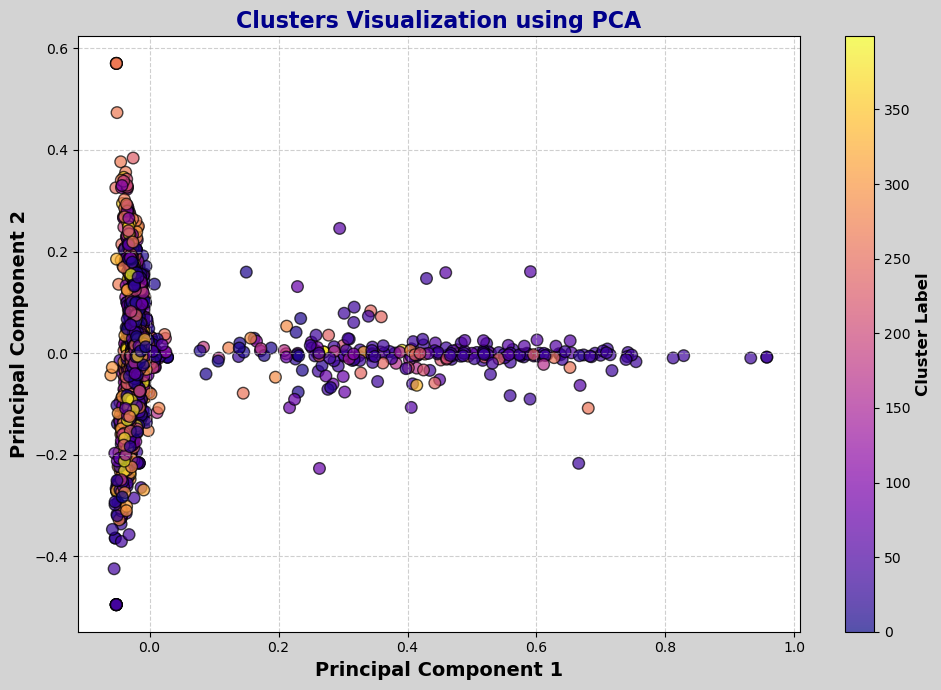

In [137]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X is your feature matrix

# Define plot size and background color
plt.figure(figsize=(10, 7), facecolor='lightgrey')

# Scatter plot for PCA components
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='plasma', s=70, edgecolor='k', alpha=0.7)

# Enhancing title and labels
plt.title('Clusters Visualization using PCA', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Principal Component 1', fontsize=14, weight='bold')
plt.ylabel('Principal Component 2', fontsize=14, weight='bold')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adding color bar with a label
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=12, weight='bold')

# Show plot with tight layout
plt.tight_layout()
plt.show()


. OBSERVATIONS
--------------------
. PCA Visualization: The plot uses PCA to reduce the dimensionality of SMS messages and visualize them in 2D.

. Cluster Representation: Each color in the plot represents a different cluster formed by the algorithm.

. Cluster Overlap: Some clusters overlap, indicating that certain SMS messages share similarities despite being in different groups

. Similarity Across Clusters: The overlap suggests that some spam and non-spam messages may have common features, making them harder to differentiate.

. Trends Detected: The clustering algorithm successfully identified some trends within the messages.

. Clustering Limitations: Distinguishing between different types of messages (e.g., spam and non-spam) may be challenging using clustering alone